In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
np.random.seed(42)
m = 1000
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

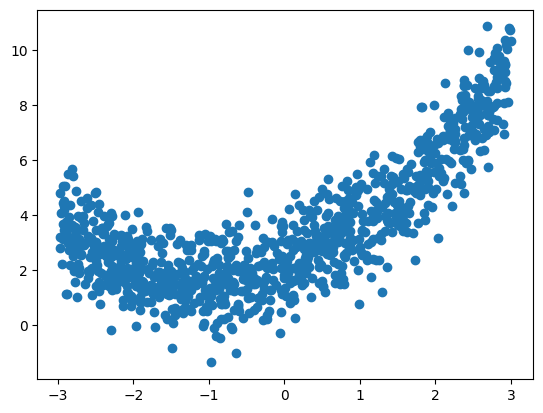

In [84]:
plt.scatter(X, y)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [88]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
print("w_0", lr.intercept_)
print("w_1", lr.coef_)

w_0 [3.64337017]
w_1 [[0.97082348]]


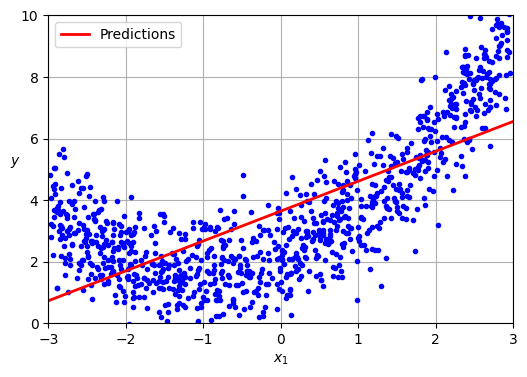

In [90]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = lr.predict(X_new)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

y_predict = lr.predict(X_test)
mean_squared_error(y_test, y_predict, squared=False)
r2_score(y_test, y_predict)

0.4328438528931047

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=30, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_poly[0] #### (x_1, x_1 ^ 2)

array([-2.72129752e+00,  7.40546021e+00, -2.01524605e+01,  5.48408410e+01,
       -1.49238245e+02,  4.06121666e+02, -1.10517788e+03,  3.00751784e+03,
       -8.18435084e+03,  2.22720537e+04, -6.06088845e+04,  1.64934807e+05,
       -4.48836683e+05,  1.22141815e+06, -3.32384220e+06,  9.04516354e+06,
       -2.46145811e+07,  6.69835987e+07, -1.82282301e+08,  4.96044375e+08,
       -1.34988433e+09,  3.67343688e+09, -9.99651469e+09,  2.72034907e+10,
       -7.40287918e+10,  2.01454368e+11, -5.48217272e+11,  1.49186231e+12,
       -4.05980120e+12,  1.10479269e+13])

In [106]:
lr = LinearRegression()
lr.fit(X_poly,y_train)

LinearRegression()

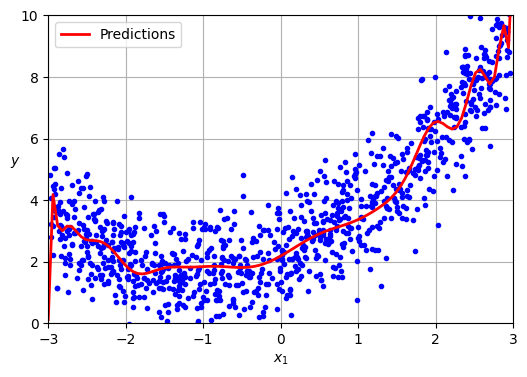

In [107]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lr.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [108]:
X_poly_test = poly_features.transform(X_test)
y_predict = lr.predict(X_poly_test)
mean_squared_error(y_test, y_predict, squared=False)
r2_score(y_test, y_predict)

0.8196175448508469

In [109]:
ridge_regression = Ridge(alpha=0.5, solver="cholesky")
ridge_regression.fit(X_poly, y_train)
y_predict = ridge_regression.predict(X_poly_test)
r2_score(y_test, y_predict)

0.8224945488622761

In [103]:
lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(X_poly, y_train)
y_predict = lasso_regression.predict(X_poly_test)
r2_score(y_test, y_predict)

/home/ashkan/Documents/ML-Basic1/ML-Basic-venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.725e+02, tolerance: 4.448e-01
  model = cd_fast.enet_coordinate_descent(


0.8095322594656035

In [32]:
X_2_dim = X.reshape(50,2)
poly_features_2_dim = poly_features.fit_transform(X_2_dim)
print(X_2_dim.shape)
poly_features_2_dim.shape

(50, 2)


(50, 5)